# Metody relaksacyjne dla równania Poissona

In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import time

sns.set(font="Times New Roman")
sns.set_context("paper", font_scale=1.2)


## Zadanie 1

In [ ]:
dim1 = 40
dx,dy = 1,1
rho = np.zeros((dim1,dim1))
fi = np.zeros((dim1,dim1))

In [ ]:
for i in range(dim1):
  for j in range(dim1):
    if 10<i<30 and 10<j<30:
      rho[i,j] = 1

Text(0.5, 1.0, 'Rozmieszczenie ładunku w układzie')

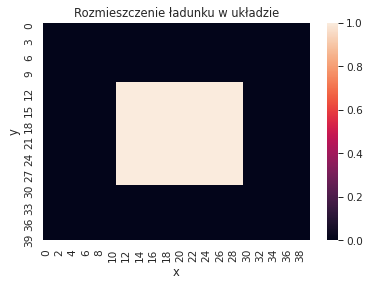

In [ ]:
sns.heatmap(rho)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Rozmieszczenie ładunku w układzie")


In [ ]:
def poisson(w=0):
  for i in range(1,dim1-1):
    for j in range(1,dim1-1):
      fi[i,j] = (1-w)*fi[i,j]+w/4*(fi[i+1,j]+fi[i-1,j]+fi[i,j+1]+fi[i,j-1]+rho[i,j]*dx**2)

def pochodna_dx(i,j):
  return ((fi[i+1,j]-fi[i-1,j])/(2*dx))**2

def pochodna_dy(i,j):
  return ((fi[i+1,j]-fi[i-1,j])/(2*dy))**2
  
def całka():
  suma = 0
  for i in range(1,dim1-1):
    for j in range(1,dim1-1):
      suma += (1/2*(pochodna_dx(i,j)+pochodna_dy(i,j)-rho[i,j]*fi[i,j]))
      
  return suma

def Symulacja(w=0):
  wart_calki = []
  wart_i = []
  wart_calki.append(całka())
  poisson(w)
  wart_calki.append(całka())
  
  n = 1
  
  while(abs(wart_calki[n] - wart_calki[n-1]) > 0.00001):
    poisson(w)
    wart_calki.append(całka())
    n+=1

  wart_i.append(n)
  return wart_calki,wart_i

In [ ]:
w = np.arange(0,1.99,0.1)
wynik = []
wari = []
for w in w:
  rho = np.zeros((dim1,dim1))
  fi = np.zeros((dim1,dim1)) 

  for i in range(dim1):
    for j in range(dim1):
      if 10<i<30 and 10<j<30:
        rho[i,j] = 1 

  test,war = Symulacja(w)
  wari.append(war)
  wynik.append(test)

In [ ]:
w = np.arange(0,1.99,0.1)

Text(0, 0.5, 'iteracje')

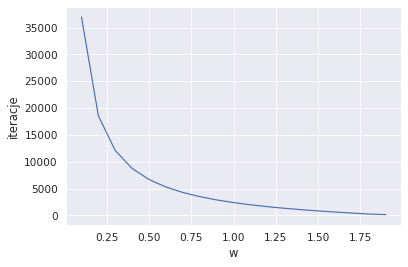

In [ ]:
plt.plot(w[1:],wari[1:])
plt.xlabel("w")
plt.ylabel("iteracje")

In [ ]:
a,b = Symulacja(1.95)

Text(0.5, 1.0, 'Rozwiązanie równania dla fi ')

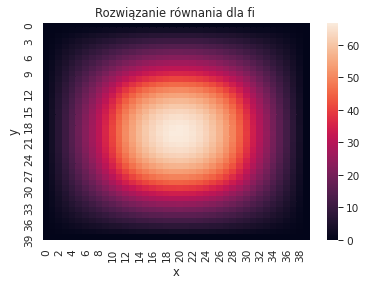

In [ ]:
sns.heatmap(fi)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Rozwiązanie równania dla fi ")

## Zadanie 2

In [ ]:
def całka2():
  suma = 0
  for i in range(1,dim1-1):
    for j in range(1,dim1-1):
      suma += (1/2*pochodna_dy(i,j)-rho[i,j]*fi[i,j])

def Symulacja2(w=0):
  wart_calki = []
  wart_i = []
  wart_calki.append(całka())
  poisson(w)
  wart_calki.append(całka())
  
  n = 1
  
  while(abs(wart_calki[n] - wart_calki[n-1]) > 0.00001):
    r2()
    wart_calki.append(całka())
    n+=1

  wart_i.append(n)
  r2()
  return wart_calki,wart_i

def r2():
  for i in range(1,dim1-1):
    for j in range(1,dim1-1):
      rho2[i,j] = - ( fi[i+1,j] + fi[i-1,j] + fi[i,j+1] + fi[i,j-1] - 4 * fi[i,j] ) /dx**2

In [ ]:
rho2=np.zeros((dim1,dim1))
Symulacja2()

([-9436.062052774361, -9436.062052774361], [1])

Text(0.5, 1.0, 'Sprawdzenie dla rozwiązanego równania ')

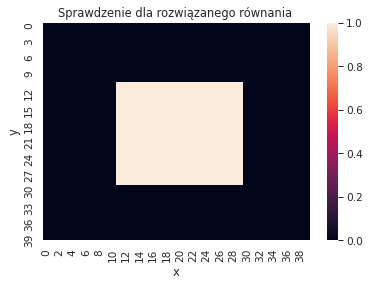

In [ ]:
sns.heatmap(rho2)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Sprawdzenie dla rozwiązanego równania ")